## Data Wrangling: Clean, Transform, Merge, Reshape

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [3]:
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Combining and merging data sets

### Database-style DataFrame merges

In [6]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df1
df2

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


,data2,key
0,0,a
1,1,b
2,2,d


In [8]:
pd.merge(df1, df2) # SQL로 따지면 natural inner join 이다!!
# 공통으로 있는 column의 공통으로 있는 값만 가지고 join을 하네!!

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [10]:
pd.merge(df1, df2, on='key') # SQL에서 inner join using을 쓴 것이다.

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [11]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
df3
df4

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


,data2,rkey
0,0,a
1,1,b
2,2,d


In [12]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey') # SQL에서 join on으로 key 값을 지정해 주는 것과 같다.

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [15]:
pd.merge(df1, df2, how='outer') # SQL의 outer join을 하네.
# how에 outer inner left right 있다,

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


https://pandas.pydata.org/pandas-docs/stable/merging.html
참고함!! 잠깐!

In [16]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})
df1
df2

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [17]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [18]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [23]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
left 
right

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [24]:
pd.merge(left, right, on=['key1', 'key2'], how='outer') # join column을 2개를 사용하네!!

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [25]:
pd.merge(left, right, on='key1') # 중복되는 key2의 column 명이 변경되었네..

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [26]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))
# suffixes는,접미어로 겹치는 컬럼 이름 뒤에 붙일 문자열을 지정해 줄 수 있다.

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on index

In [27]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1
right1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


,group_val
a,3.5
b,7.0


In [29]:
pd.merge(left1, right1, left_on='key', right_index=True)
pd.merge(right1, left1, right_on='key', left_index=True)
# 결과 값이 같네,

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


,group_val,key,value
0,3.5,a,0
2,3.5,a,2
3,3.5,a,3
1,7.0,b,1
4,7.0,b,4


In [30]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [33]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth
righth # hierarchical index 이네,

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [36]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)
# right index를 한번에 true로 지정해 버리네!!
# 당연히 순서가 맞아야지!!!
# default : inner join 이지!!

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [37]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [39]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
left2
right2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [40]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)
# index 끼리 join 함!!

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [41]:
left2.join(right2, how='outer') # 위와 결과가 같음!!

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


- default가 **left outer join**이다!!

In [44]:
left1
right1
left1.join(right1, on='key') 

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


,group_val
a,3.5
b,7.0


,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [47]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
left2
right2
another

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [49]:
left2.join([right2, another]) # 한번에 3개 조인 했네!!
                              # list로 묶어서 줬네!!
                              # default : left outer join!!

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [52]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


인덱스가 를 사용하는 join에서는 같은 column이 있으면 안된다. 그럴 때는 merge를 사용해야 한다.

### Concatenating along an axis

In [53]:
arr = np.arange(12).reshape((3, 4))

In [54]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [56]:
np.concatenate([arr, arr], axis=1)
np.concatenate([arr, arr], axis=0)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [62]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['a', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])
s1; s2; s3

a    0
b    1
dtype: int64

a    2
d    3
e    4
dtype: int64

f    5
g    6
dtype: int64

In [66]:
pd.concat([s1, s2, s3]) # numpy 때는 concatenate 지!!

a    0
b    1
a    2
d    3
e    4
f    5
g    6
dtype: int64

In [71]:
pd.concat([s1, s2, s3], axis=1) # 대박! 
                                # axis=1 열이니까!?!

,0,1,2
a,0.0,2.0,NaN
b,1.0,NaN,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [74]:
s1;s3;
s4 = pd.concat([s1 * 5, s3]) # 계산 후 concat 하기!!
s4

a    0
b    1
dtype: int64

f    5
g    6
dtype: int64

a    0
b    5
f    5
g    6
dtype: int64

In [76]:
s1; s4;
pd.concat([s1, s4], axis=1)
pd.concat([s1, s4], axis=0)

a    0
b    1
dtype: int64

a    0
b    5
f    5
g    6
dtype: int64

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


a    0
b    1
a    0
b    5
f    5
g    6
dtype: int64

In [77]:
pd.concat([s1, s4], axis=1, join='inner') # join option이 있네.
                                          # default는 outer 이네!!

,0,1
a,0,0
b,1,5


In [84]:
s1
s4
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])
# join_axes는 머지하려는 축을 직접 지정해줄 수 있다 (261p)
# join_axes : list of Index objects Specific indexed to use for the other n-1 axes instead of performing  inner/outer set logic
# 그냥 index를 직접 지정하네!!!

a    0
b    1
dtype: int64

a    0
b    5
f    5
g    6
dtype: int64

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [87]:
s1
s2
s3
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three']) # hierarchical index라고 보면 되나?! ㅇㅇ
result

a    0
b    1
dtype: int64

a    2
d    3
e    4
dtype: int64

f    5
g    6
dtype: int64

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [93]:
# Much more on the unstack function later
result.unstack() # 괄호안에 level을 주게 된다. default 값은 -1이다. 즉 맨 마지막 index!
                                                                #   최하위 index!!!

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [94]:
result.unstack(level=0)

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [95]:
result.unstack(0).stack()

a  one      0.0
   two      0.0
b  one      1.0
   two      1.0
f  three    5.0
g  three    6.0
dtype: float64

In [105]:
s1;s2;s3;
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])
# keys를 지정해서 column을 선택하네..

a    0
b    1
dtype: int64

a    2
d    3
e    4
dtype: int64

f    5
g    6
dtype: int64

,one,two,three
a,0.0,2.0,NaN
b,1.0,NaN,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [102]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
df1
df2
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

,one,two
a,0,1
b,2,3
c,4,5


,three,four
a,5,6
c,7,8


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [106]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)
# 위랑 같은 결과를 도출함!!

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [107]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])
# one, two, three, four 가 lower다!!

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [108]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [109]:
df1

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221


In [110]:
df2

,b,d,a
0,0.274992,0.228913,1.352917
1,0.886429,-2.001637,-0.371843


In [114]:
pd.concat([df1, df2], ignore_index=True)
pd.concat([df1, df2])
# index 그대로 rbind 하는지, index 새로해서 rbind 하는지!!

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
0,1.352917,0.274992,NaN,0.228913
1,-0.371843,0.886429,NaN,-2.001637


### Combining data with overlap

In [126]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
a
b
b[-1] = np.nan # 마지막값 NaN
a
b

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [127]:
a
b
np.where(pd.isnull(a), b, a) # 책,140p where(condition, true_value, false_value)
# 이런식으로 NaN을 처리할 수도 있겠네...

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [130]:
b[:-2]
a[2:]
b[:-2].combine_first(a[2:]) 
# 없는 index는 추가시켜준다!! 그리고 index를 정렬시켜 준다!

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [133]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df1
df2
df1.combine_first(df2) # 없는 index는 추가시켜주고, 값있으면 그대로 값없으면 df2 것을 사용함!!
# update and insert = upsert 라고 부른다 이런것을!!

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and pivoting
- 표의 형태를 바꾸는 거다!!

### Reshaping with hierarchical indexing

In [135]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'), 
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
                 # 각각 index 객체를 만들어서 넣어주었다!!
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [142]:
result = data.stack()
result
type(result)

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

pandas.core.series.Series

In [139]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [144]:
type(result.unstack(0))
result.unstack(0)

pandas.core.frame.DataFrame

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [141]:
result.unstack('state') # level 0일때와 같지! 

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [152]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
s1; s2;
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2 # Series
data2.unstack() # DataFrame

a    0
b    1
c    2
d    3
dtype: int64

c    4
d    5
e    6
dtype: int64

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [153]:
data2.unstack().stack() # float64로 변했네, null 값 때문에 실수로 바뀐거임!!

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [155]:
data2.unstack().stack(dropna=False)
# stack option으로 NA값을 살림

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [162]:
result
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df
# series를 dictionary로 써서 dataframe을 만드네!! 

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [158]:
df.unstack('state') # df.unstack(0) 와 같지

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [163]:
df.unstack('state').stack('side') # state를 올리고, side를 내린다!!

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

### Pivoting "long" to "wide" format

In [166]:
data = pd.read_csv('ch07/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [168]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [170]:
data.to_records() # tuple의 list로 만듬.

rec.array([ (0, 1959.0, 1.0, 2710.349, 1707.4, 286.89799999999997, 470.045, 1886.9, 28.98, 139.7, 2.82, 5.8, 177.146, 0.0, 0.0),
 (1, 1959.0, 2.0, 2778.801, 1733.7, 310.85900000000004, 481.301, 1919.7, 29.15, 141.7, 3.08, 5.1, 177.83, 2.34, 0.74),
 (2, 1959.0, 3.0, 2775.488, 1751.8, 289.226, 491.26, 1916.4, 29.35, 140.5, 3.82, 5.3, 178.657, 2.74, 1.09),
 (3, 1959.0, 4.0, 2785.204, 1753.7, 299.356, 484.05199999999996, 1931.3, 29.37, 140.0, 4.33, 5.6, 179.386, 0.27, 4.06),
 (4, 1960.0, 1.0, 2847.699, 1770.5, 331.722, 462.199, 1955.5, 29.54, 139.6, 3.5, 5.2, 180.007, 2.31, 1.19),
 (5, 1960.0, 2.0, 2834.39, 1792.9, 298.152, 460.4, 1966.1, 29.55, 140.2, 2.68, 5.2, 180.671, 0.14, 2.55),
 (6, 1960.0, 3.0, 2839.022, 1785.8, 296.375, 474.676, 1967.8, 29.75, 140.9, 2.36, 5.6, 181.528, 2.7, -0.34),
 (7, 1960.0, 4.0, 2802.616, 1788.2, 259.764, 476.434, 1966.6, 29.84, 141.1, 2.29, 6.3, 182.287, 1.21, 1.08),
 (8, 1961.0, 1.0, 2819.264, 1787.7, 266.405, 475.85400000000004, 1984.5, 29.81, 142.1, 2.37,

In [172]:
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end')) # 3분기를 날짜로 표현하게 짜네!!!
data

item,realgdp,infl,unemp
date,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2
1960-06-30,2834.390,0.14,5.2
1960-09-30,2839.022,2.70,5.6
1960-12-31,2802.616,1.21,6.3
1961-03-31,2819.264,-0.40,6.8


In [179]:
type(data.stack())
data.stack()

pandas.core.series.Series

date        item   
1959-03-31  realgdp     2710.349
            infl           0.000
            unemp          5.800
1959-06-30  realgdp     2778.801
            infl           2.340
            unemp          5.100
1959-09-30  realgdp     2775.488
            infl           2.740
            unemp          5.300
1959-12-31  realgdp     2785.204
            infl           0.270
            unemp          5.600
1960-03-31  realgdp     2847.699
            infl           2.310
            unemp          5.200
1960-06-30  realgdp     2834.390
            infl           0.140
            unemp          5.200
1960-09-30  realgdp     2839.022
            infl           2.700
            unemp          5.600
1960-12-31  realgdp     2802.616
            infl           1.210
            unemp          6.300
1961-03-31  realgdp     2819.264
            infl          -0.400
            unemp          6.800
1961-06-30  realgdp     2872.005
            infl           1.470
            unemp      

In [180]:
type(data.stack().reset_index())
data.stack().reset_index() # index를 없애는 거다!! index 자체도 data로 변환하네!!!

pandas.core.frame.DataFrame

,date,item,0
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [182]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})
# column명이 0 이었던 것을 'value'로 바꿔주었다. .rename()
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


위가 피벗의 한 과정을 보여준 것이다!!

In [174]:
wdata = ldata.pivot('date', 'item', 'value') # ldata를 한번에 PIVOT 때림!!
# unstack 시키기!!
# 어디 데이터를 뽑아서 column에 순서대로 나열할 것인가...
wdata

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2
1960-06-30,0.14,2834.390,5.2
1960-09-30,2.70,2839.022,5.6
1960-12-31,1.21,2802.616,6.3
1961-03-31,-0.40,2819.264,6.8


In [184]:
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [185]:
pivoted = ldata.pivot('date', 'item', 'value') # index / column / value 다!!
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [186]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,1.669025
1,1959-03-31,infl,0.000,-0.438570
2,1959-03-31,unemp,5.800,-0.539741
3,1959-06-30,realgdp,2778.801,0.476985
4,1959-06-30,infl,2.340,3.248944
5,1959-06-30,unemp,5.100,-1.021228
6,1959-09-30,realgdp,2775.488,-0.577087
7,1959-09-30,infl,2.740,0.124121
8,1959-09-30,unemp,5.300,0.302614
9,1959-12-31,realgdp,2785.204,0.523772


In [187]:
pivoted = ldata.pivot('date', 'item') # values를 생략해 준 것과 같네!! 
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.438570  1.669025 -0.539741
1959-06-30  2.34  2778.801   5.1  3.248944  0.476985 -1.021228
1959-09-30  2.74  2775.488   5.3  0.124121 -0.577087  0.302614
1959-12-31  0.27  2785.204   5.6  0.000940  0.523772  1.343810
1960-03-31  2.31  2847.699   5.2 -0.831154 -0.713544 -2.370232

In [192]:
pivoted['value']['infl'][:5]
pivoted['value'][:5]
pivoted['value2'][:5]

date
1959-03-31    0.00
1959-06-30    2.34
1959-09-30    2.74
1959-12-31    0.27
1960-03-31    2.31
Name: infl, dtype: float64

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


item,infl,realgdp,unemp
date,,,
1959-03-31,-0.438570,1.669025,-0.539741
1959-06-30,3.248944,0.476985,-1.021228
1959-09-30,0.124121,-0.577087,0.302614
1959-12-31,0.000940,0.523772,1.343810
1960-03-31,-0.831154,-0.713544,-2.370232


In [197]:
ldata[:5]
ldata.set_index(['date','item'])[:5] # 말 그대로, index를 setting 해주네!!

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,1.669025
1,1959-03-31,infl,0.000,-0.438570
2,1959-03-31,unemp,5.800,-0.539741
3,1959-06-30,realgdp,2778.801,0.476985
4,1959-06-30,infl,2.340,3.248944


value    value2
date       item                       
1959-03-31 realgdp  2710.349  1.669025
           infl        0.000 -0.438570
           unemp       5.800 -0.539741
1959-06-30 realgdp  2778.801  0.476985
           infl        2.340  3.248944

In [198]:
unstacked = ldata.set_index(['date', 'item']).unstack('item') # reset_index의 반대이다.
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.438570  1.669025 -0.539741
1959-06-30  2.34  2778.801   5.1  3.248944  0.476985 -1.021228
1959-09-30  2.74  2775.488   5.3  0.124121 -0.577087  0.302614
1959-12-31  0.27  2785.204   5.6  0.000940  0.523772  1.343810
1960-03-31  2.31  2847.699   5.2 -0.831154 -0.713544 -2.370232
1960-06-30  0.14  2834.390   5.2 -0.860757 -1.860761  0.560145
1960-09-30  2.70  2839.022   5.6  0.119827 -1.265934 -1.063512

## Data transformation

### Removing duplicates

In [204]:
data = DataFrame({'k1': ['one'] * 4 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 1, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,one,3
4,two,3
5,two,4
6,two,1
7,two,4


In [205]:
data.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool

In [208]:
data.drop_duplicates() # remove duplicated row
data # 데이터에 변동이 생기는 것은 아니다!

,k1,k2
0,one,1
2,one,2
3,one,3
4,two,3
5,two,4
6,two,1


,k1,k2
0,one,1
1,one,1
2,one,2
3,one,3
4,two,3
5,two,4
6,two,1
7,two,4


In [215]:
data['v1'] = range(8)
data
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,one,3,3
4,two,3,4
5,two,4,5
6,two,1,6
7,two,4,7


,k1,k2,v1
0,one,1,0
4,two,3,4


In [216]:
data.drop_duplicates(['k1', 'k2'], keep='last') # default는 keep first 이다!! 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':


,k1,k2,v1
1,one,1,1
2,one,2,2
3,one,3,3
4,two,3,4
6,two,1,6
7,two,4,7


### Transforming data using a function or mapping

In [217]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [223]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}
meat_to_animal
type(meat_to_animal)
meat_to_animal['bacon']

{'bacon': 'pig',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon',
 'pastrami': 'cow',
 'pulled pork': 'pig'}

dict

'pig'

In [225]:
str.lower(data['food']) # 안된다. universial function이 아니다!! 

TypeError: descriptor 'lower' requires a 'str' object but received a 'Series'

In [227]:
data['food'].map(str.lower)
data['food']

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

0          bacon
1    pulled pork
2          bacon
3       Pastrami
4    corned beef
5          Bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [222]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) 
# map, 함수에 보내겠다. stream에서 넘어온 값을 하나하나 함수를 적용시켜 주겠다. map!!
# 직독직해하면, data의 food에 lower 적용시켜서 이를 key로 하는 meat_to_animal value를 뽑아 주겠다!!!
data
# join이랑 비슷하다고도 할 수 있다,

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [231]:
data['food'].map(lambda x: meat_to_animal[x.lower()])
# data['food']에서 받아서 x라고 하네, 그걸 소문자로 바꾸고 그것을 meat_to_animal에 key 값으로 넣어준다!! 
data['animal2'] = data['food'].map(lambda x: meat_to_animal[x.lower()])
data

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,Pastrami,6.0,cow,cow
4,corned beef,7.5,cow,cow
5,Bacon,8.0,pig,pig
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


- 성능체크!! 

In [236]:
%timeit data['food'].map(lambda x: meat_to_animal[x.lower()])
# 500 안에서 처리하는 게 많은 거고
# 성능상 이게 더 빠르다.

The slowest run took 5.64 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 112 µs per loop


- 느린거는 5배이상 느린게 있더라!! 

In [237]:
%timeit data['food'].map(str.lower).map(meat_to_animal) 
# 500 번 돌리고 그안에서 또 500번 돌리고

1000 loops, best of 3: 455 µs per loop


### Replacing values

In [245]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [246]:
data.replace(-999, np.nan)
# data[data == -999] = np.nan # 실제값이 바뀌지!! 

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [247]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [248]:
data.replace([-999, -1000], [np.nan, 0]) # list를 주었지!

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [249]:
data.replace({-999: np.nan, -1000: 0}) # 위와 동일한 형식이다.

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming axis indexes

In [264]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [265]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [266]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [267]:
data.rename(index=str.title, columns=str.upper) # rename에 함수로 바로 적용하네!!!
# data는 변동이 되지 않았지.
data 

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [268]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [269]:
# Always returns a reference to a DataFrame
data
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
# inplace 직접 데이터의 속성을 변경! data 변경 되었지!! 
# data.rename(index={'OHIO': 'INDIANA'}, inplace=True) 이렇게 써도 됨!
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and binning
이산화!! 구간화!!

In [270]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [271]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [274]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [275]:
cats.categories

Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype='object')

In [277]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

pandas.core.series.Series

In [278]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False) # right 포함 하지 않는다!!

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [280]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names) # Label 달아줌!

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [282]:
pd.value_counts(pd.cut(ages,bins, labels=group_names))

Youth         5
MiddleAged    3
YoungAdult    3
Senior        1
dtype: int64

In [294]:
data = np.random.rand(20)
x=pd.cut(data, 4, precision=2) # precesion은 정밀도. 유효숫자이다!! 
                             # ***자릿수가 아니다!! 0.0037 도 되지!! 
                             # 4는 4등분 하라는 소리다
data
pd.value_counts(x)

array([ 0.2083,  0.0774,  0.6136,  0.4229,  0.3557,  0.5913,  0.7189,
        0.2654,  0.1771,  0.3393,  0.1633,  0.9308,  0.9806,  0.9139,
        0.0449,  0.8458,  0.1646,  0.3711,  0.6563,  0.0768])

(0.044, 0.28]    8
(0.75, 0.98]     4
(0.51, 0.75]     4
(0.28, 0.51]     4
dtype: int64

In [295]:
data = np.random.randn(1000) # Normally distributed
# 정규분포에서 sampling 한거지!! random값 뽑기!! 이건 -1 ~ 1 이지 rand는 0~1이지!! 
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[[-3.428, -0.667], (0.715, 2.654], (0.0153, 0.715], [-3.428, -0.667], (0.715, 2.654], ..., (0.0153, 0.715], (0.0153, 0.715], (0.0153, 0.715], (0.715, 2.654], (0.0153, 0.715]]
Length: 1000
Categories (4, object): [[-3.428, -0.667] < (-0.667, 0.0153] < (0.0153, 0.715] < (0.715, 2.654]]

In [296]:
pd.value_counts(cats) # 4등분 해주는 cut 을 찾는거다!! 
                      # 4등분 해주는 bin을 찾는거다!!

(0.715, 2.654]      250
(0.0153, 0.715]     250
(-0.667, 0.0153]    250
[-3.428, -0.667]    250
dtype: int64

In [299]:
t = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]) # 그냥 cut이랑 똑같다!!!
                                          # 정규분포에서 뽑은 거니까!!
    # 백분율로 값을 준거지, 10% 40% 40% 10% 이런식으로!! 범위를 준거지!!
pd.value_counts(t)

(0.0153, 1.27]      400
(-1.342, 0.0153]    400
(1.27, 2.654]       100
[-3.428, -1.342]    100
dtype: int64

### Detecting and filtering outliers, 이상치

In [309]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.head()
data.describe()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [304]:
col = data[3]
# col
col[np.abs(col) > 3] # abs는 universial 함수이지!! 그래서가능!!

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [306]:
np.abs(data) > 3

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [305]:
data[(np.abs(data) > 3).any(1)] # .any(axis = 1) 이다. 
                                # 열의 집합에서 하나라도 절대값이 3이 넘으면 출력!!

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [317]:
data[np.abs(data) > 3] = np.sign(data) * 3 # sign 부호를 리턴한다!! 
data.describe() # 이상치를 -3으로 땡겨 온거다!! min이 -3 인것을 볼 수 있지!!

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation and random sampling

In [325]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
df
sampler = np.random.permutation(5) # random하게 뽑힌다!  해을 랜덤으로 뽑나?!
sampler

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


array([3, 4, 2, 1, 0])

In [326]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [327]:
df.take(sampler) # sampler 했던 것대로 df을 다시 배치!

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
2,8,9,10,11
1,4,5,6,7
0,0,1,2,3


In [331]:
df.take(np.random.permutation(len(df))[:3]) # 일반화 시켰다. 3같은 경우도 parameter로 받을 수 있지!
df.take(np.random.permutation(len(df)))

,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [333]:
bag = np.array([5, 7, -1, 6, 4])
bag
sampler = np.random.randint(0, len(bag), size=10) # index를 뽑아내네!! 
                                        # 이렇게 뽑아내는 행동을 10번 하는 거다!! 
sampler

array([ 5,  7, -1,  6,  4])

array([2, 1, 2, 1, 0, 1, 2, 2, 2, 0])

In [334]:
sampler

array([2, 1, 2, 1, 0, 1, 2, 2, 2, 0])

In [343]:
draws = bag.take(sampler)
draws

array([-1,  7, -1,  7,  5,  7, -1, -1, -1,  5])

### 로또 시뮬레이션

In [352]:
sampler = np.random.randint(0, 46, size = 6)

In [354]:
sampler

array([33, 27, 23, 36,  0,  3])

In [374]:
def lotto(x):
    data = DataFrame(index=[1,2,3,4,5,6])
    for i in range(x):
        data[i] = np.random.randint(1, 46, size = 6)
    return data.T

In [376]:
lotto(5)

,1,2,3,4,5,6
0,35,41,6,37,7,9
1,39,44,34,34,31,1
2,14,41,43,33,22,14
3,18,22,14,35,19,16
4,14,25,16,37,15,45


In [394]:
ttat = Series(np.arange(10))

In [395]:
ttat.map(lambda x: x*3)

0     0
1     3
2     6
3     9
4    12
5    15
6    18
7    21
8    24
9    27
dtype: int64

In [397]:
    def lotto(won):
        lottos = Series(np.arange(won))\
                .map(lambda x: np.sort(np.random.permutation(45)[:6]+1))
        return lottos

In [398]:
lotto(10)

0    [17, 19, 20, 22, 25, 33]
1    [20, 28, 36, 38, 43, 45]
2     [2, 26, 28, 30, 41, 42]
3       [6, 7, 9, 12, 24, 29]
4     [8, 22, 25, 28, 30, 40]
5     [4, 10, 17, 20, 28, 30]
6     [3, 10, 13, 20, 21, 24]
7     [9, 13, 15, 22, 32, 39]
8     [1, 17, 20, 22, 26, 36]
9     [8, 13, 15, 20, 25, 39]
dtype: object

- lambda는 이렇게 이해하면 된다.

### Computing indicator / dummy variables

In [402]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df # 일종의 mask 라고 하네!!
pd.get_dummies(df['key'])

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [407]:
df['data1']

0    0
1    1
2    2
3    3
4    4
5    5
Name: data1, dtype: int32

In [410]:
df[['data1']]

,data1
0,0
1,1
2,2
3,3
4,4
5,5


In [404]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies
df_with_dummy = df[['data1']].join(dummies) # dataframe 만들기 위해서 [[]] 로 해주었다!! 
df_with_dummy # index join 해 주었지!! 

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [420]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [425]:
type('Action|Crime|Thriller'.split('|'))

list

In [424]:
type(set('Action|Crime|Thriller'.split('|')))

set

In [427]:
genre_iter = (set(x.split('|')) for x in movies.genres) #()를 통해서 generator를 지정하는 것이다
# 각 영화의 장르를 set으로 만들어 놓는다. 
type(genre_iter)
genre_iter

generator

<generator object <genexpr> at 0x000000000A328CA8>

In [428]:
genres = sorted(set.union(*genre_iter)) # set.union 쓰려면 set형태를 넣어야 한다!!
# 들어간 set들이 union이니 다 하나의 집합으로 만든다 *합집합*!!!
genres # 장르보기!

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [437]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [438]:
gen.split('|') # list로 주네!!
dummies.loc[i, gen.split('|')]

['Drama', 'Thriller']

Drama       0.0
Thriller    0.0
Name: 3882, dtype: float64

In [439]:
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')] = 1

In [433]:
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [443]:
movies[:5]

movies_windic = movies.join(dummies.add_prefix('Genre_')) # 값 앞에 붙임 'Genre_'
movies_windic.loc[0]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [444]:
np.random.seed(12345)

In [445]:
values = np.random.rand(10)
values

array([ 0.9296,  0.3164,  0.1839,  0.2046,  0.5677,  0.5955,  0.9645,
        0.6532,  0.7489,  0.6536])

In [451]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins)).sum()

(0, 0.2]      1
(0.2, 0.4]    2
(0.4, 0.6]    2
(0.6, 0.8]    3
(0.8, 1]      2
dtype: int64

In [449]:
pd.get_dummies(pd.cut(values, bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## String manipulation

### String object methods

In [452]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [456]:
val.split(',')

['a', 'b', '  guido']

In [454]:
[print(x.strip()) for x in val.split(',')]

a
b
guido


[None, None, None]

In [457]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [458]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [459]:
'::'.join(pieces)

'a::b::guido'

In [460]:
'guido' in val

True

In [463]:
val

'a,b,  guido'

In [464]:
val.index(',')

1

In [467]:
val.find(':') # 못찾으니까 -1이 return 되지!!

-1

In [466]:
val.index(':')

ValueError: substring not found

In [468]:
val.count(',')

2

In [469]:
val.replace(',', '::')

'a::b::  guido'

In [470]:
val.replace(',', '')

'ab  guido'

In [471]:
val

'a,b,  guido'

### Regular expressions

In [5]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text) # re module의 split 이다!!

text.split(' ') # re split과 다르지!! 


['foo', '', '', '', 'bar\t', 'baz', '', '\tqux']

In [6]:
regex = re.compile('\s+') # compile 해서 객체화 시켜놓은거다!!!
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [7]:
text
regex.findall(text) # 해당 구분자를 찾아주네!! 
re.findall('o', text)

['o', 'o']

In [8]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
@naver.com
"""
text
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}' # email pattern

# character list
# - 은 번위를 뜻한다.
# . 아무 캐릭터 하나 이지만 [.] 들어가면 정말 . 을 뜻한다.
# + 로 여러번 나오는 것을 나타냄!! 
# \는 \. 실제 점을 뜻한다. 기능을 벗어나라!! 
# [A-Z]{2,4} => A-Z가 2~4번 나옴!

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE) # 이것도 객체화 시켜놓은 것이다!!
                                        # IGNORECASE 덕에 소문자도 인식하는 거다!! 
                                        # 안쓸거면 a-z 추가하면 된다.
regex

re.compile(r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}', re.IGNORECASE|re.UNICODE)

In [9]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [10]:
m = regex.search(text)
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [11]:
text[m.start():m.end()]

'dave@google.com'

In [12]:
print(regex.match(text))

None


In [15]:
print(regex)
print(text)
print(regex.sub('REDACTED', text)) # regex에 해당하는 부분 redacted 으로 대체!!!! 

re.compile('[A-Z0-9._%+-]+@[A-Z0-9.-]+\\.[A-Z]{2,4}', re.IGNORECASE)
Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
@naver.com

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED
@naver.com



In [18]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
pattern
regex

re.compile(r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})',
re.IGNORECASE|re.UNICODE)

In [39]:
m = regex.match('wesm@bright.net')
m2 = regex.search('wesm@bright.net')
print(m.groups()) # () 그룹 만든것 매치되는 것을 group으로 받아서 출력한다!! tuple 형태로!!
print(m2.groups())
print(m.group(0))
print(m.group(1))
print(m.group(2))

# match는 문장 처음 일치 여부, search는 최초 일치하는 것!

('wesm', 'bright', 'net')
('wesm', 'bright', 'net')
wesm@bright.net
wesm
bright


In [28]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [29]:
print(text)

Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
@naver.com



In [27]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))
# 여기서 \1 \2 \3 는 첫번째 두번째 세번째 그룹을 나타낸다. () 묶여있는!! 

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com
@naver.com



In [32]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)
#?P 해서! tag 처럼 사용한다! 
regex

re.compile(r'\n    (?P<username>[A-Z0-9._%+-]+)\n    @\n    (?P<domain>[A-Z0-9.-]+)\n    \.\n    (?P<suffix>[A-Z]{2,4})',
re.IGNORECASE|re.UNICODE|re.VERBOSE)

In [33]:
m = regex.match('wesm@bright.net')
m.groupdict() # 사전형으로 return 해준다.


{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

### Vectorized string functions in pandas

In [50]:
import numpy as np
import pandas as pd

In [51]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)

In [52]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [53]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [54]:
data.str.contains('gmail') # gmail 인 것 찾기 !!! 

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [56]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [58]:
regex.findall(data) # Series는 들어가지 않는다!! 

TypeError: expected string or bytes-like object

In [63]:
data.map(regex.findall) # NaN 값 때문에 안되는 거다!! 

TypeError: expected string or bytes-like object

In [62]:
# 빼고 하면 되기는 한다!! 
data[:-1].map(regex.findall)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
dtype: object

In [65]:
# 일반화처럼 써보면
data[data.notnull()].map(regex.findall)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
dtype: object

In [68]:
df = pd.DataFrame(data)
df

,0
Dave,dave@google.com
Rob,rob@gmail.com
Steve,steve@gmail.com
Wes,NaN


In [70]:
df[df.notnull()].map(regex.findall) # map dataframe에 못쓴다.

AttributeError: 'DataFrame' object has no attribute 'map'

In [72]:
df[:-1].applymap(regex.findall) # map dataframe에 못쓴다.

,0
Dave,"[(dave, google, com)]"
Rob,"[(rob, gmail, com)]"
Steve,"[(steve, gmail, com)]"


- 하단이 더 좋은 방법이다!! 

In [73]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [74]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object

In [82]:
matches.str.get(1)

Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object

In [83]:
matches.str.get(0)

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object

In [76]:
matches.str[0]

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object

In [77]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

## Example: USDA Food Database

In [5]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
print(len(db))
print(type(db))

6636
<class 'list'>


In [6]:
db[0]

{'description': 'Cheese, caraway',
 'group': 'Dairy and Egg Products',
 'id': 1008,
 'manufacturer': '',
 'nutrients': [{'description': 'Protein',
   'group': 'Composition',
   'units': 'g',
   'value': 25.18},
  {'description': 'Total lipid (fat)',
   'group': 'Composition',
   'units': 'g',
   'value': 29.2},
  {'description': 'Carbohydrate, by difference',
   'group': 'Composition',
   'units': 'g',
   'value': 3.06},
  {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
  {'description': 'Energy',
   'group': 'Energy',
   'units': 'kcal',
   'value': 376.0},
  {'description': 'Water',
   'group': 'Composition',
   'units': 'g',
   'value': 39.28},
  {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 1573.0},
  {'description': 'Fiber, total dietary',
   'group': 'Composition',
   'units': 'g',
   'value': 0.0},
  {'description': 'Calcium, Ca',
   'group': 'Elements',
   'units': 'mg',
   'value': 673.0},
  {'description': 'Iron, Fe',
   'group': 

In [7]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [8]:
len(db[0]['nutrients'])
db[0]['nutrients'][0]

162

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [9]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [10]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [11]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [12]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [13]:
info.group

0                  Dairy and Egg Products
1                  Dairy and Egg Products
2                  Dairy and Egg Products
3                  Dairy and Egg Products
4                  Dairy and Egg Products
5                  Dairy and Egg Products
6                  Dairy and Egg Products
7                  Dairy and Egg Products
8                  Dairy and Egg Products
9                  Dairy and Egg Products
10                 Dairy and Egg Products
11                 Dairy and Egg Products
12                 Dairy and Egg Products
13                 Dairy and Egg Products
14                 Dairy and Egg Products
15                 Dairy and Egg Products
16                 Dairy and Egg Products
17                 Dairy and Egg Products
18                 Dairy and Egg Products
19                 Dairy and Egg Products
20                 Dairy and Egg Products
21                 Dairy and Egg Products
22                 Dairy and Egg Products
23                 Dairy and Egg P

In [14]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [15]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True) # concat 대신에 dataframe 가능

In [16]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [17]:
nutrients.duplicated().sum() # 중복값 있늦지 14179 건 중복값

14179

In [18]:
nutrients = nutrients.drop_duplicates()

In [19]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'} # column 이름 바꾼거다!! 
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [20]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [21]:
ndata = pd.merge(nutrients, info, on='id', how='outer') # id column으로 outer join
# pandas에는 비동등 조인은 없다.

In [22]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [23]:
ndata.loc[30000] #iloc 30000이면 30000번째 값을 본다.

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

- 단백질은 몇개 있는가?!

In [24]:
x = ndata[ndata.nutrient == "Protein"]
len(x)
x.shape


6636

(6636, 8)

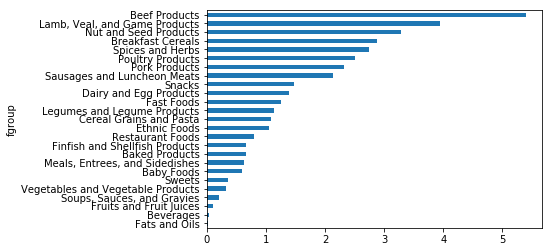

In [26]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) # 중앙값을 구하는 것과 같다!! 
result['Zinc, Zn'].sort_values().plot(kind='barh')
# result 중에서 아연 성분에 대해서만 정렬해서 plot 한거임!! 

In [34]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
by_nutrient

In [36]:
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

In [37]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [39]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 